In [ ]:
!pip install numpy pandas seaborn matplotlib scikit-learn

## **Import Libraries and Load Data:**

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN


%matplotlib inline

import os
os.environ['OMP_NUM_THREADS'] = '1'

In [10]:
dataset = pd.read_csv('hflights.csv')

## **Exploratory Data Analysis:**


In [11]:
dataset.shape

(227496, 22)

In [12]:
dataset.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,UniqueCarrier,FlightNum,TailNum,...,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted
0,5424,2011,1,1,6,1400.0,1500.0,AA,428,N576AA,...,-10.0,0.0,IAH,DFW,224,7.0,13.0,0,NaN,0
1,5425,2011,1,2,7,1401.0,1501.0,AA,428,N557AA,...,-9.0,1.0,IAH,DFW,224,6.0,9.0,0,NaN,0
2,5426,2011,1,3,1,1352.0,1502.0,AA,428,N541AA,...,-8.0,-8.0,IAH,DFW,224,5.0,17.0,0,NaN,0
3,5427,2011,1,4,2,1403.0,1513.0,AA,428,N403AA,...,3.0,3.0,IAH,DFW,224,9.0,22.0,0,NaN,0
4,5428,2011,1,5,3,1405.0,1507.0,AA,428,N492AA,...,-3.0,5.0,IAH,DFW,224,9.0,9.0,0,NaN,0


In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227496 entries, 0 to 227495
Data columns (total 22 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         227496 non-null  int64  
 1   Year               227496 non-null  int64  
 2   Month              227496 non-null  int64  
 3   DayofMonth         227496 non-null  int64  
 4   DayOfWeek          227496 non-null  int64  
 5   DepTime            224591 non-null  float64
 6   ArrTime            224430 non-null  float64
 7   UniqueCarrier      227496 non-null  object 
 8   FlightNum          227496 non-null  int64  
 9   TailNum            226701 non-null  object 
 10  ActualElapsedTime  223874 non-null  float64
 11  AirTime            223874 non-null  float64
 12  ArrDelay           223874 non-null  float64
 13  DepDelay           224591 non-null  float64
 14  Origin             227496 non-null  object 
 15  Dest               227496 non-null  object 
 16  Di

In [14]:
dataset.isnull().sum()

Unnamed: 0                0
Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                2905
ArrTime                3066
UniqueCarrier             0
FlightNum                 0
TailNum                 795
ActualElapsedTime      3622
AirTime                3622
ArrDelay               3622
DepDelay               2905
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 3066
TaxiOut                2947
Cancelled                 0
CancellationCode     224523
Diverted                  0
dtype: int64

In [15]:
dataset.duplicated().sum()

np.int64(0)

## **Handle all missing values using simple imputer for all numerical values and for categorical values**

In [16]:
numimputer = SimpleImputer(missing_values=np.nan, strategy='mean')
numimputer = numimputer.fit(dataset[[
    'DepTime','ArrTime','ActualElapsedTime', 'AirTime','ArrDelay','DepDelay', 'TaxiIn', 'TaxiOut'
    ]])
dataset[[
    'DepTime','ArrTime','ActualElapsedTime', 'AirTime','ArrDelay','DepDelay', 'TaxiIn', 'TaxiOut'
    ]] = numimputer.transform(dataset[[
        'DepTime','ArrTime','ActualElapsedTime', 'AirTime','ArrDelay','DepDelay', 'TaxiIn', 'TaxiOut'
        ]])
catimputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
catimputer = catimputer.fit(dataset[['TailNum']])
dataset[['TailNum']] = catimputer.transform(dataset[['TailNum']])

## **Drop cancellation code column because it has too many missing values**

In [17]:
dataset.drop(['CancellationCode'], axis=1, inplace=True)

In [18]:
dataset.isnull().any().sum()

np.int64(0)

In [19]:
dataset.describe()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,ArrTime,FlightNum,ActualElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
count,2.274960e+05,227496.0,227496.000000,227496.000000,227496.000000,227496.000000,227496.000000,227496.000000,227496.000000,227496.000000,227496.000000,227496.000000,227496.000000,227496.000000,227496.000000,227496.000000,227496.000000
mean,3.021458e+06,2011.0,6.513662,15.737446,3.947691,1395.755614,1578.254106,1961.663141,129.323745,108.142335,7.094334,9.444951,787.783245,6.098855,15.091098,0.013068,0.002853
std,1.755914e+06,0.0,3.417676,8.782705,1.990272,445.450614,469.207586,1430.793403,58.811993,56.103211,30.463077,28.619120,453.680566,3.934287,7.690075,0.113568,0.053335
min,5.424000e+03,2011.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,34.000000,11.000000,-70.000000,-33.000000,79.000000,1.000000,1.000000,0.000000,0.000000
25%,1.555452e+06,2011.0,4.000000,8.000000,2.000000,1023.000000,1220.000000,855.000000,78.000000,59.000000,-8.000000,-3.000000,376.000000,4.000000,10.000000,0.000000,0.000000
50%,3.114682e+06,2011.0,7.000000,16.000000,4.000000,1411.000000,1611.000000,1696.000000,129.000000,108.000000,0.000000,0.000000,809.000000,5.000000,14.000000,0.000000,0.000000
75%,4.556825e+06,2011.0,9.000000,23.000000,6.000000,1759.000000,1950.000000,2755.000000,164.000000,140.000000,11.000000,9.444951,1042.000000,7.000000,18.000000,0.000000,0.000000
max,6.083259e+06,2011.0,12.000000,31.000000,7.000000,2400.000000,2400.000000,7290.000000,575.000000,549.000000,978.000000,981.000000,3904.000000,165.000000,163.000000,1.000000,1.000000


# Histograms

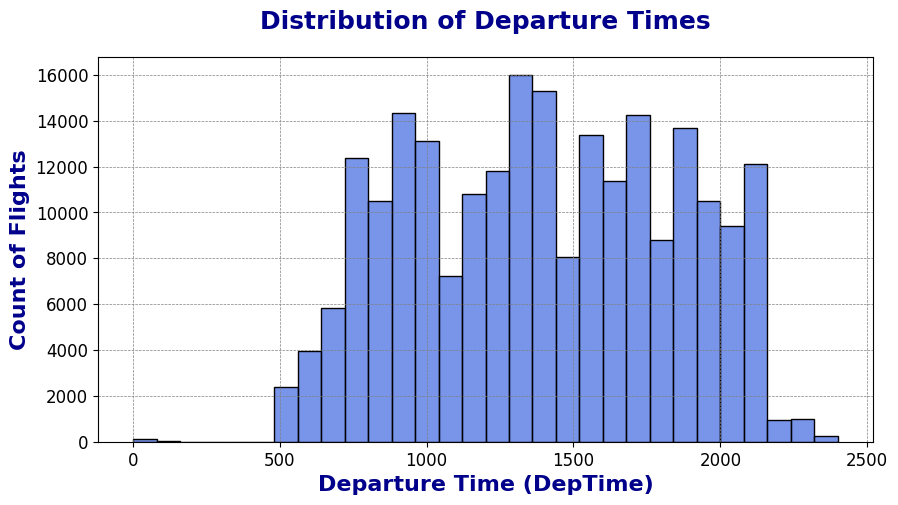

In [20]:
plt.figure(figsize=(10,5))
sns.histplot(x='DepTime', data=dataset, bins=30, color='royalblue', edgecolor='black', alpha=0.7)
plt.grid(visible=True, which='major', linestyle='--', linewidth=0.5, color='gray')
plt.xlabel('Departure Time (DepTime)', fontsize=16, fontweight='bold', color='darkblue')
plt.ylabel('Count of Flights', fontsize=16, fontweight='bold', color='darkblue')
plt.title('Distribution of Departure Times', fontsize=18, fontweight='bold', color='darkblue', pad=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

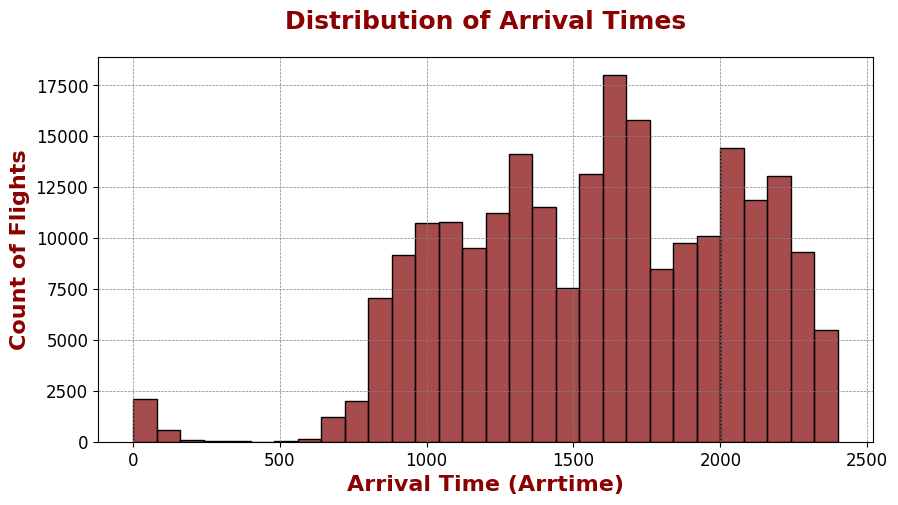

In [21]:
plt.figure(figsize=(10,5))
sns.histplot(x='ArrTime', data=dataset, bins=30, color='maroon', edgecolor='black', alpha=0.7)
plt.grid(visible=True, which='major', linestyle='--', linewidth=0.5, color='gray')
plt.xlabel('Arrival Time (Arrtime)', fontsize=16, fontweight='bold', color='darkred')
plt.ylabel('Count of Flights', fontsize=16, fontweight='bold', color='darkred')
plt.title('Distribution of Arrival Times', fontsize=18, fontweight='bold', color='darkred', pad=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

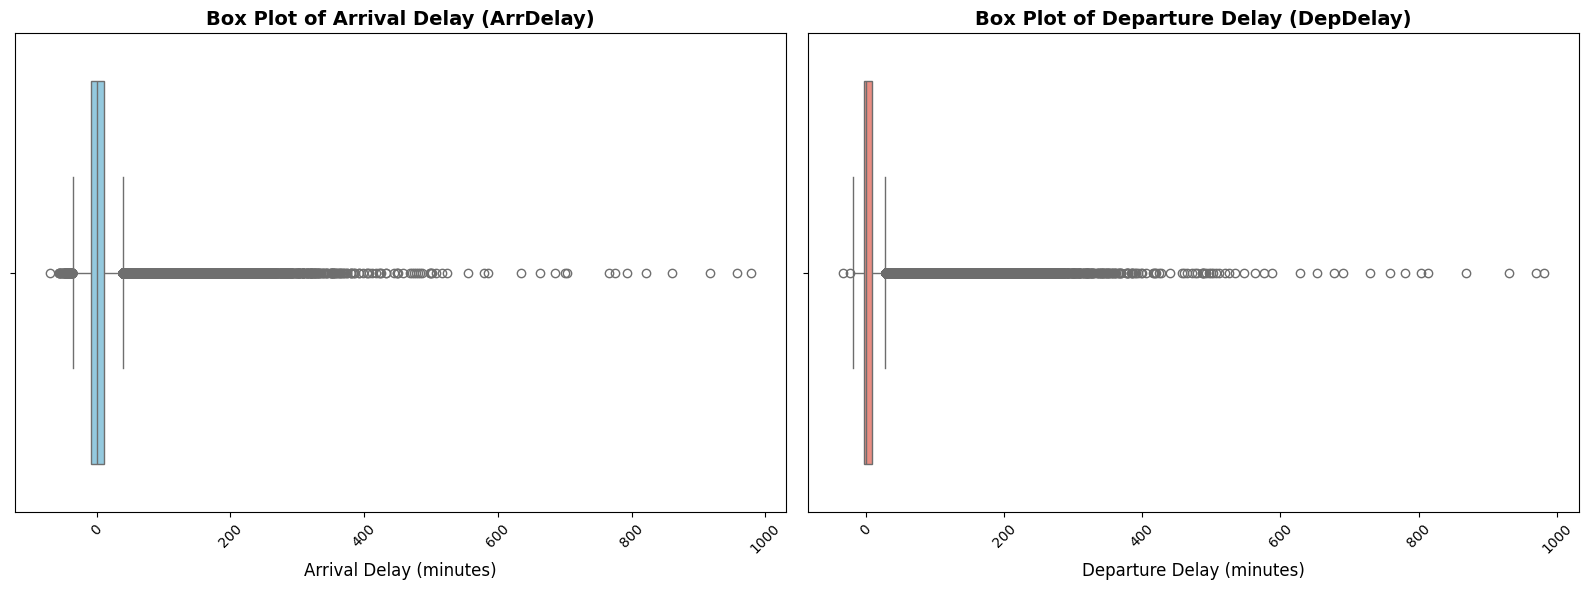

In [22]:
plt.figure(figsize=(16, 6))

# Create a subplot for ArrDelay
plt.subplot(1, 2, 1)
sns.boxplot(x='ArrDelay', data=dataset, color='skyblue')
plt.title('Box Plot of Arrival Delay (ArrDelay)', fontsize=14, fontweight='bold')
plt.xlabel('Arrival Delay (minutes)', fontsize=12)
plt.xticks(rotation=45)

# Create a subplot for DepDelay
plt.subplot(1, 2, 2)
sns.boxplot(x='DepDelay', data=dataset, color='salmon')
plt.title('Box Plot of Departure Delay (DepDelay)', fontsize=14, fontweight='bold')
plt.xlabel('Departure Delay (minutes)', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

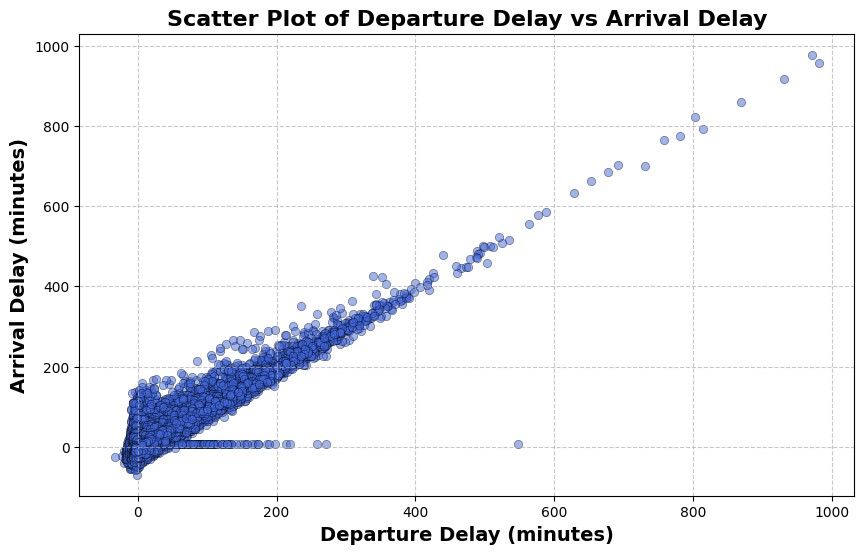

In [23]:
plt.figure(figsize=(10, 6))

# Create the scatter plot
sns.scatterplot(x='DepDelay', y='ArrDelay', data=dataset, alpha=0.5, color='royalblue', edgecolor='black')

# Add labels and title
plt.xlabel('Departure Delay (minutes)', fontsize=14, fontweight='bold')
plt.ylabel('Arrival Delay (minutes)', fontsize=14, fontweight='bold')
plt.title('Scatter Plot of Departure Delay vs Arrival Delay', fontsize=16, fontweight='bold')

# Add a grid for better readability
plt.grid(visible=True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()

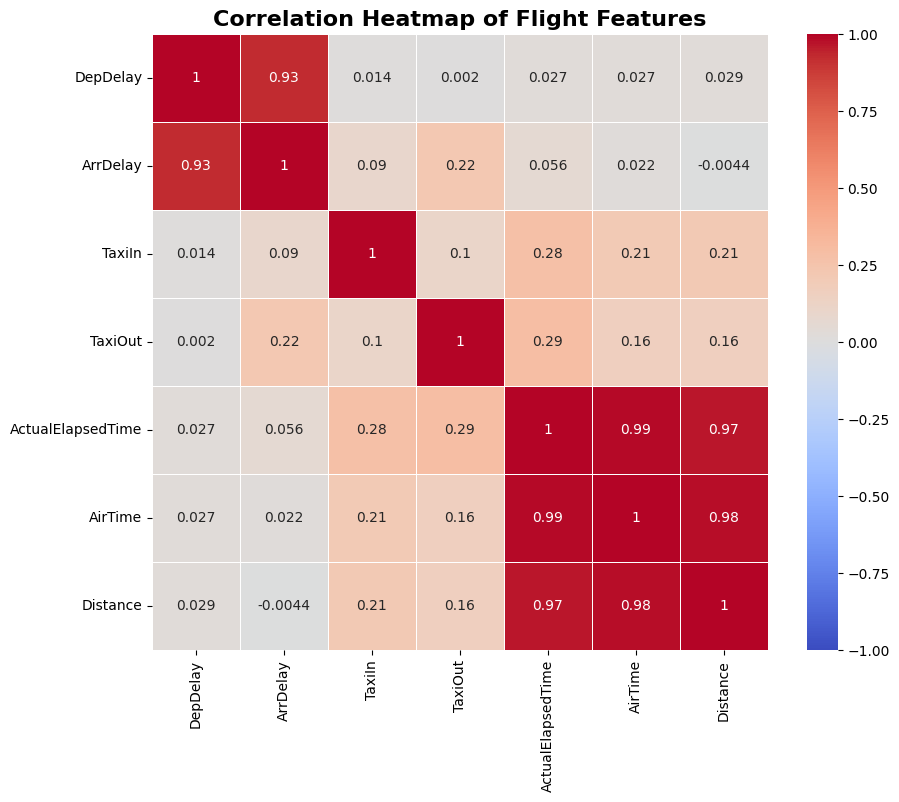

In [24]:
# Calculate the correlation matrix
correlation_matrix = dataset[['DepDelay', 'ArrDelay', 'TaxiIn', 'TaxiOut', 'ActualElapsedTime', 'AirTime', 'Distance']].corr()

# Set up the figure size
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True, linewidths=0.5)

# Add title
plt.title('Correlation Heatmap of Flight Features', fontsize=16, fontweight='bold')

# Show the plot
plt.show()

<Figure size 1200x1200 with 0 Axes>

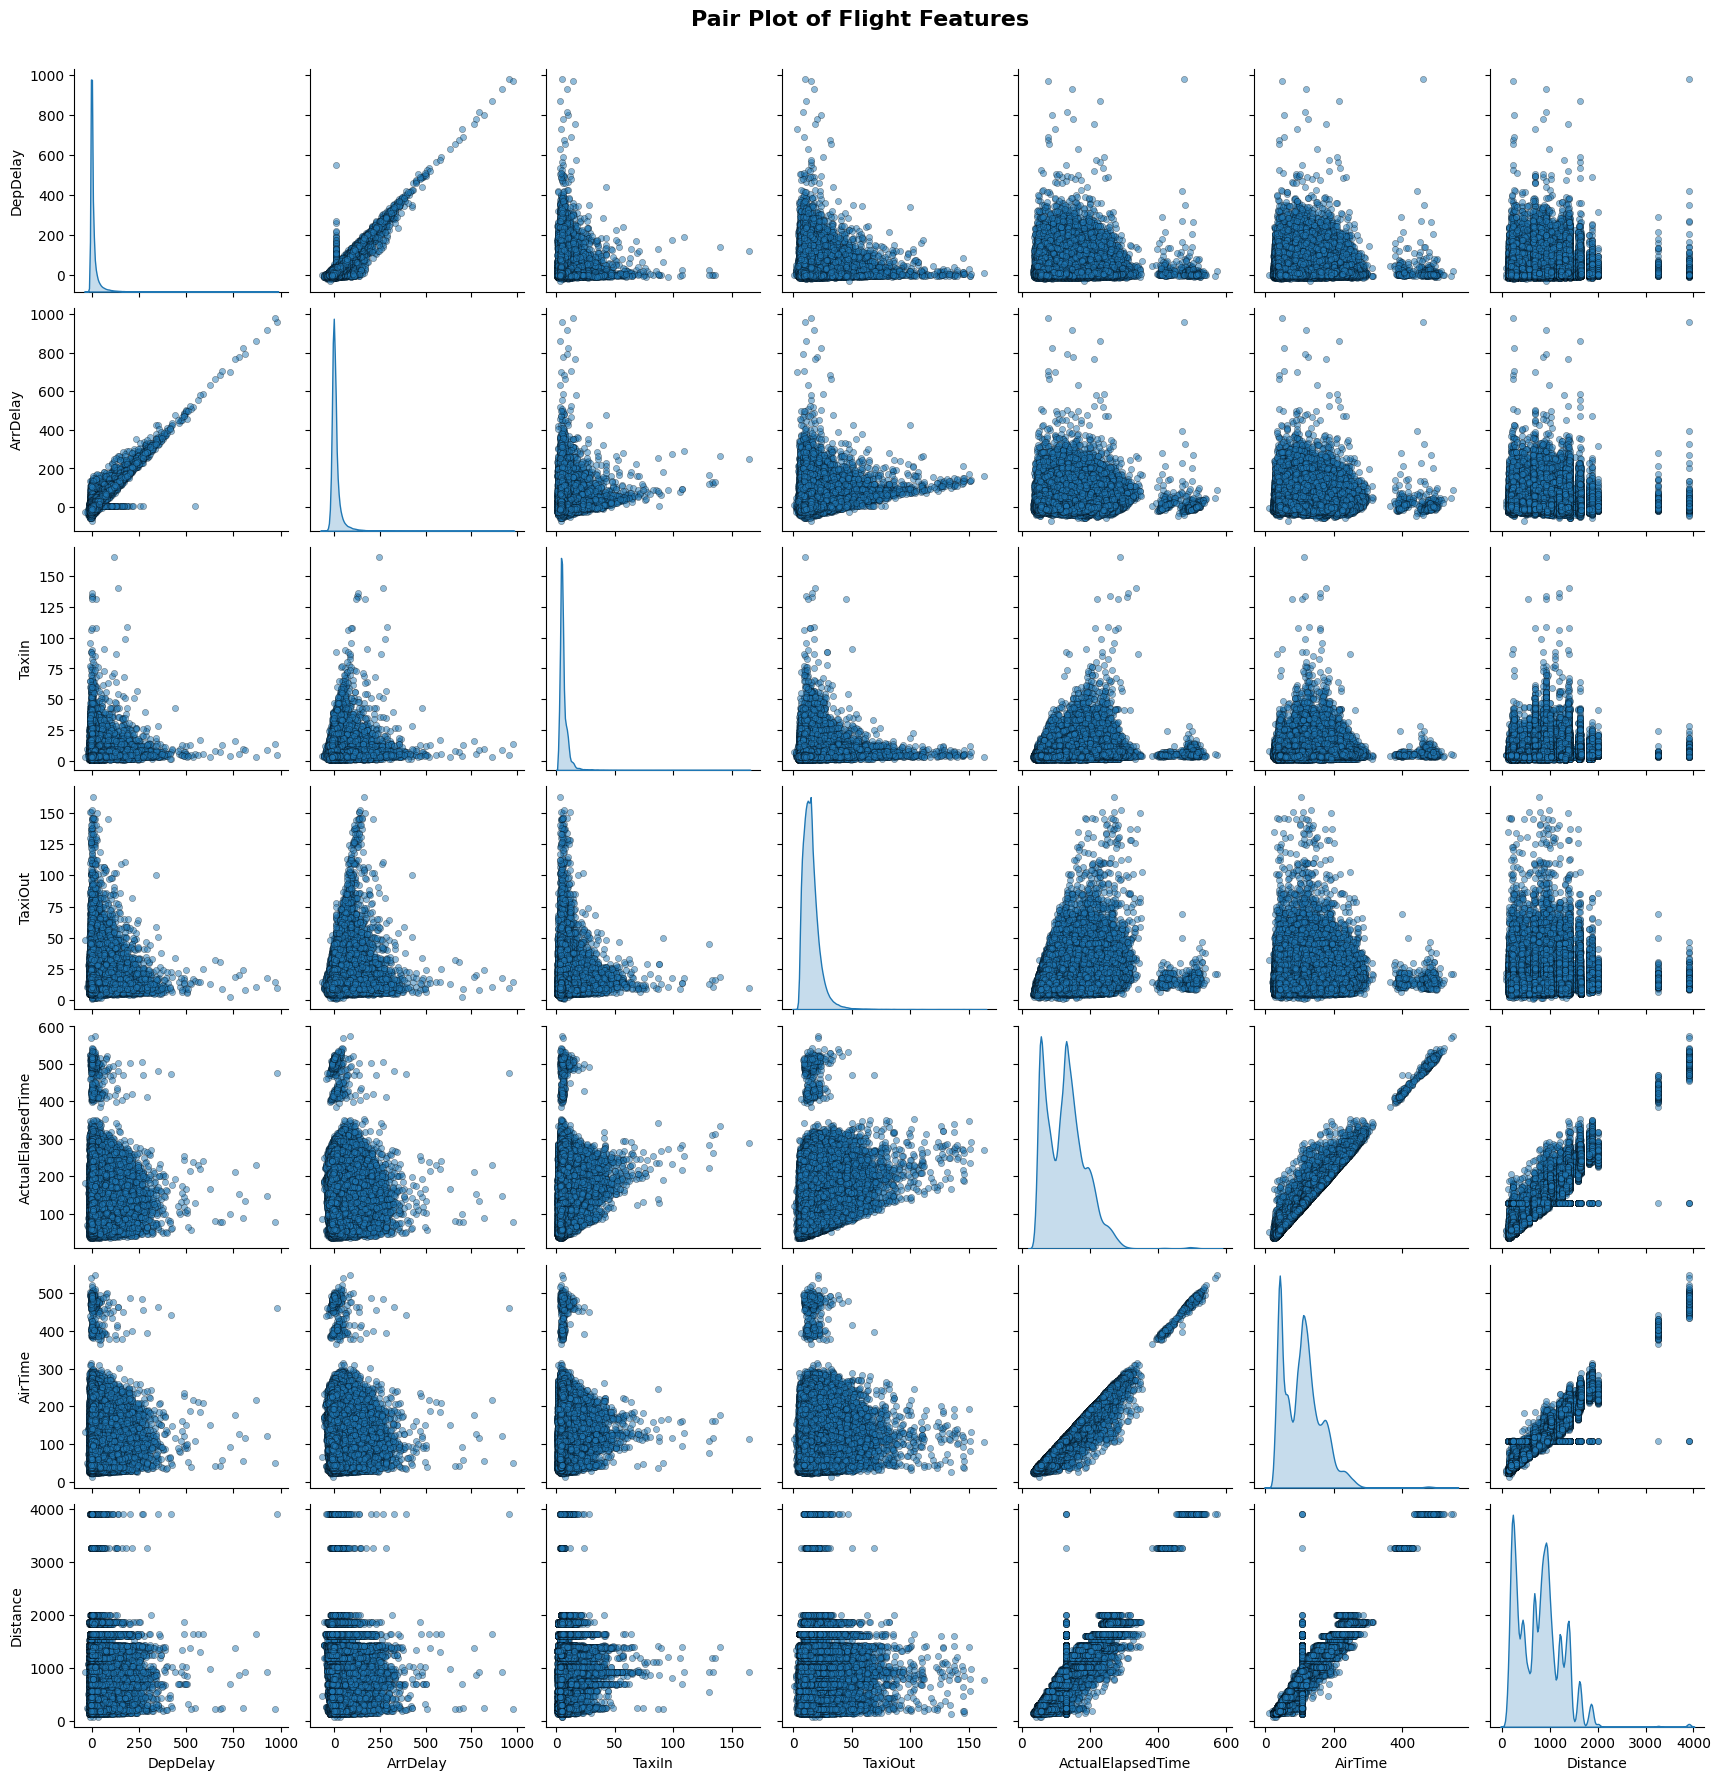

In [25]:
features = ['DepDelay', 'ArrDelay', 'TaxiIn', 'TaxiOut', 'ActualElapsedTime', 'AirTime', 'Distance']

# Creating the pair plot
plt.figure(figsize=(12, 12))
sns.pairplot(dataset[features], diag_kind='kde', plot_kws={'alpha':0.5, 's':20, 'edgecolor':'k'}, markers="o")

# Show the plot
plt.suptitle('Pair Plot of Flight Features', y=1.02, fontsize=16, fontweight='bold')
plt.show()

In [26]:
# Define thresholds for outliers
arr_delay_threshold = 300
dep_delay_threshold = 300

# Filter out outliers in ArrDelay and DepDelay
dataset = dataset[(dataset['ArrDelay'] <= arr_delay_threshold) &
                          (dataset['DepDelay'] <= dep_delay_threshold)]

# Feature Selection and engineering

In [27]:
dataset['Total Delay'] = dataset['ArrDelay'] + dataset['DepDelay']

In [28]:
dataset['Taxi Time'] = dataset['TaxiIn'] + dataset['TaxiOut']

In [29]:
encoder = preprocessing.OrdinalEncoder()
dataset['UniqueCarrier'] = encoder.fit_transform(dataset['UniqueCarrier'].values.reshape(-1,1))

In [30]:
dataset['TailNum'] = encoder.fit_transform(dataset['TailNum'].values.reshape(-1,1))

In [31]:
dataset['Origin'] = encoder.fit_transform(dataset['Origin'].values.reshape(-1,1))

In [32]:
dataset['Dest'] = encoder.fit_transform(dataset['Dest'].values.reshape(-1,1))

## **Scaling**

In [35]:
X = dataset.iloc[:,[4,5,6,7,10,11,14,15,16,21,22]].values
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)

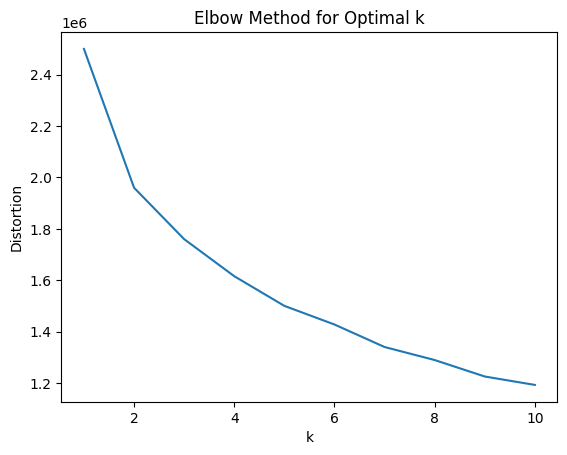

In [43]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init= 'k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Elbow Method for Optimal k')
plt.show()

In [45]:
kmeans = KMeans(n_clusters = 2, init= 'k-means++', random_state= 0)

In [33]:
# Test Silhouette Score for different numbers of clusters
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f'Silhouette Score for n_clusters={n_clusters}: {silhouette_avg}')

Silhouette Score for n_clusters=2: 0.20762879733186515
Silhouette Score for n_clusters=3: 0.15703867418878784
Silhouette Score for n_clusters=4: 0.15695349389964314
Silhouette Score for n_clusters=5: 0.16269200291431443
Silhouette Score for n_clusters=6: 0.17116550169885644
Silhouette Score for n_clusters=7: 0.1638716739030039
Silhouette Score for n_clusters=8: 0.14529337127826555
Silhouette Score for n_clusters=9: 0.15134229463725973


In [56]:
pca = PCA(n_components=3)
X_reduced = pca.fit_transform(X)

In [57]:
pca.explained_variance_ratio_

array([0.3236121 , 0.17178777, 0.11417602])

In [58]:
sum(pca.explained_variance_ratio_)

np.float64(0.6095758902686143)

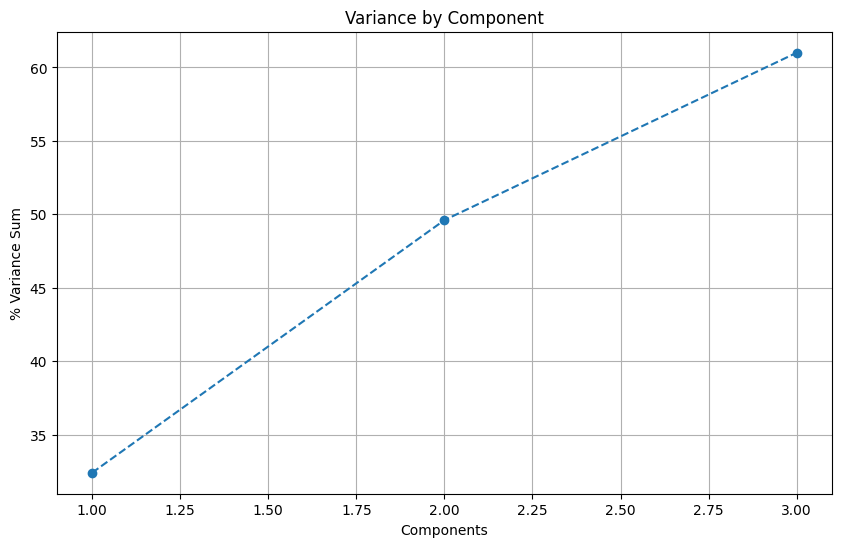

In [62]:
variance = np.round(pca.explained_variance_ratio_*100, decimals = 1)

plt.figure(figsize = (10,6))
plt.plot(range(1, len(variance)+1), variance.cumsum(), marker = "o", linestyle = "--")
plt.grid()
plt.ylabel("% Variance Sum")
plt.xlabel("Components")
plt.title("Variance by Component")
plt.show()

In [49]:
y_kmeans = kmeans.fit_predict(X_reduced)

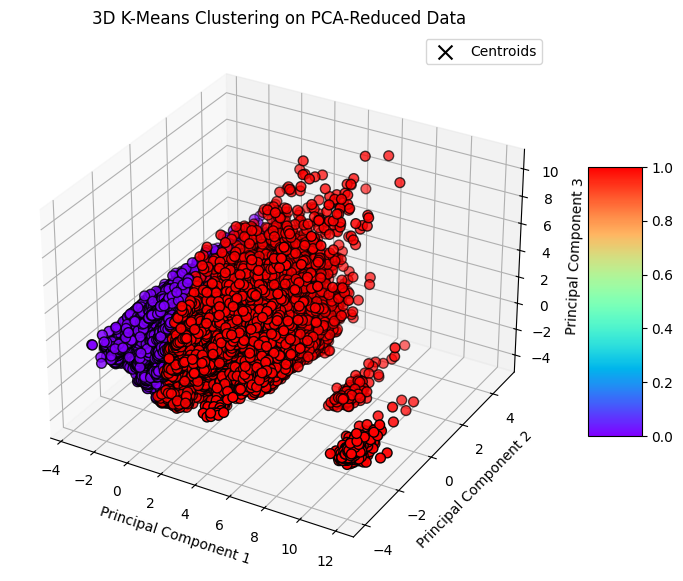

In [64]:
# Plotting the PCA-transformed data in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the data points
sc = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2],
                c=y_kmeans, cmap='rainbow', s=50, edgecolor='k')

# Scatter plot for the cluster centroids
ax.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
           kmeans.cluster_centers_[:, 2], s=100, c='Black', label='Centroids', marker='x')

# Labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D K-Means Clustering on PCA-Reduced Data')
ax.legend()

# Show plot with color bar
plt.colorbar(sc, ax=ax, shrink=0.5, aspect=5)
plt.show()

In [ ]:
neighbours = NearestNeighbors(n_neighbors=2)
distances, indices = neighbours.fit(X).kneighbors(X)

distances = distances[:,1]
distances = np.sort(distances, axis=0)

plt.plot(distances)
plt.show()

In [40]:
dbscan = DBSCAN(eps=0.75, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

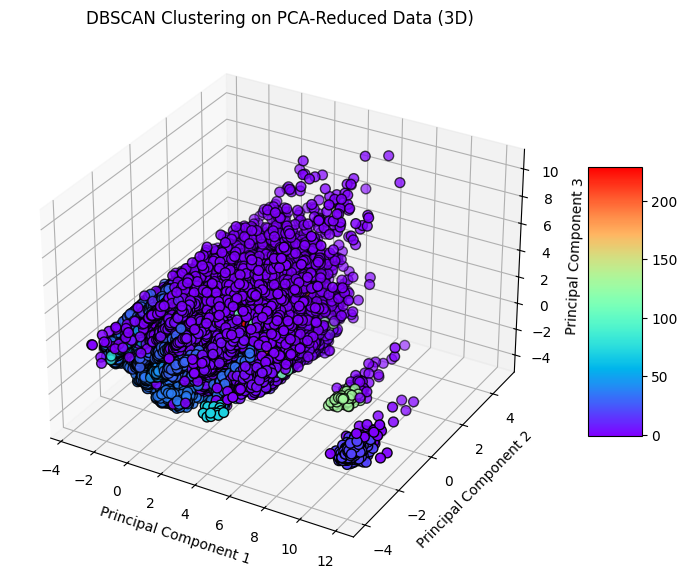

In [41]:
# Plotting the PCA-transformed data in 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the data points with DBSCAN clustering
sc = ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y_dbscan, cmap='rainbow', s=50, edgecolor='k')

# Labels and title
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('DBSCAN Clustering on PCA-Reduced Data (3D)')

# Show plot with color bar
plt.colorbar(sc, ax=ax, shrink=0.5, aspect=5)
plt.show()